# Development rig

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from waterwaves import unpack,IEj,wave,F,grids,linear

5.75 fail


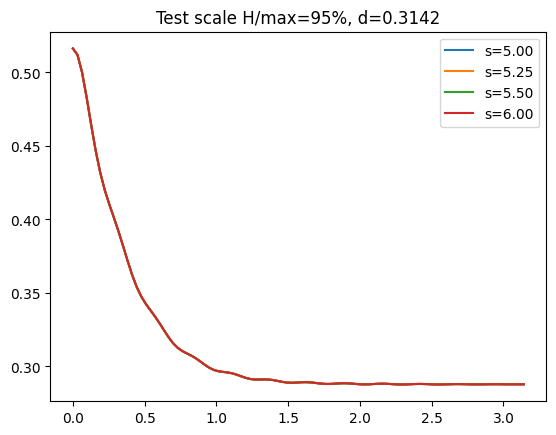

In [2]:
L_d=20
mxH_d=(0.141063*L_d+0.0095721*L_d**2+0.0077829*L_d**3)/(1+0.0788340*L_d+0.0317567*L_d**2+0.0093407*L_d**3)
d=2*np.pi/L_d

# determine a good s
N=24
H=0.95*mxH_d*d
X=np.linspace(0,np.pi,100)
for s in 1*np.linspace(5,6,5):
    sol=wave(N,H,d=d,scaler=s)
    if sol.success:
        Ej,Bj,Ub,Q,R=unpack(sol.x)
        plt.plot(X,IEj([d,*Ej],X),label=f"s={s:4.2f}")
    else:
        print(f"{s:4.2f} fail")
plt.legend()
plt.title(f'Test scale H/max={H/mxH_d/d:.0%}, d={d:6.4f}')
plt.show()

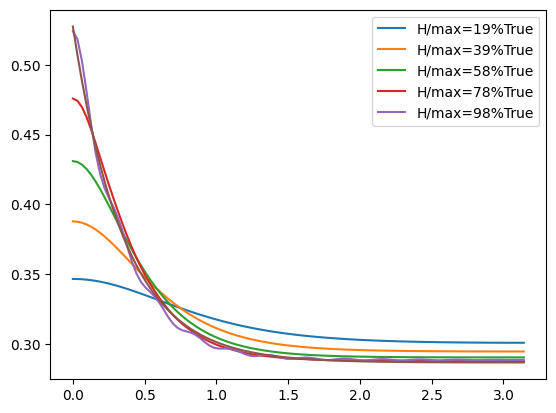

(True,
 np.float64(0.19969059656742147),
 np.float64(0.5279282880402132),
 np.float64(0.6506272323450043),
 array([9.37715597e+00, 8.46626593e+02, 8.59503580e+04, 8.76000519e+06,
        8.83150568e+08, 8.82626522e+10, 8.81238056e+12, 8.89533493e+14,
        9.21843220e+16, 9.96682088e+18, 1.13744430e+21, 1.37357405e+23,
        1.74252098e+25, 2.29291777e+27, 3.08958725e+29, 4.22123218e+31,
        5.81205743e+33, 8.03937324e+35, 1.11616155e+38, 1.55711838e+40,
        2.19320071e+42, 3.16502490e+44, 4.85372321e+46, 4.19151633e+48]),
 array([0.04671586, 0.03712497, 0.02725506, 0.01953713, 0.01414624,
        0.01051932, 0.00807964, 0.00640862, 0.00523394, 0.00438482,
        0.00375457, 0.00327573, 0.00290476, 0.00261288, 0.00238058,
        0.00219435, 0.00204466, 0.00192468, 0.00182947, 0.00175547,
        0.00170013, 0.00166171, 0.00163905, 0.00081577]),
 0.3141592653589793)

In [3]:
s=5.4
for h in np.linspace(0.2,1.03,5):
    sol=wave(N,h*H,d=d,scaler=h*s)
    Ej,Bj,Ub,Q,R=unpack(sol.x)
    plt.plot(X,IEj([d,*Ej],X),label=f"H/max={h*H/mxH_d/d:.0%}{sol.success}")

hs=2.8
plt.plot(X,d*(1+mxH_d*(np.cosh(hs*(X-np.pi))-np.sinh(hs*np.pi)/hs/np.pi)/(np.cosh(hs*np.pi)-1)))
plt.legend()
plt.show()
sol.success,Q,R,Ub,Bj,Ej,d

In [4]:
sol=wave(N,h*H,d=d,scaler=h*s,A0=sol.x)

sol.x,sol.success

(array([4.67158638e-02, 3.71249683e-02, 2.72550578e-02, 1.95371315e-02,
        1.41462364e-02, 1.05193204e-02, 8.07964166e-03, 6.40861557e-03,
        5.23394029e-03, 4.38481870e-03, 3.75456755e-03, 3.27572976e-03,
        2.90476407e-03, 2.61288205e-03, 2.38058186e-03, 2.19435420e-03,
        2.04466224e-03, 1.92467655e-03, 1.82946542e-03, 1.75546624e-03,
        1.70013483e-03, 1.66171034e-03, 1.63905420e-03, 8.15765923e-04,
        9.37715597e+00, 8.46626593e+02, 8.59503580e+04, 8.76000519e+06,
        8.83150568e+08, 8.82626522e+10, 8.81238056e+12, 8.89533493e+14,
        9.21843220e+16, 9.96682088e+18, 1.13744430e+21, 1.37357405e+23,
        1.74252098e+25, 2.29291777e+27, 3.08958725e+29, 4.22123218e+31,
        5.81205743e+33, 8.03937324e+35, 1.11616155e+38, 1.55711838e+40,
        2.19320071e+42, 3.16502490e+44, 4.85372321e+46, 4.19151633e+48,
        6.50627232e-01, 1.99690597e-01, 5.27928288e-01]),
 True)

In [7]:
from waterwaves1.wave import wave

sol=wave(N,0.1*H,d=d,scaler=d+H)

sol

 message: The solution converged.
 success: True
  status: 1
     fun: [ 9.859e-14  2.282e-14 ... -7.488e-14  6.245e-17]
       x: [ 1.080e-02  2.878e-03 ...  1.744e-01  4.685e-01]
  method: hybr
    nfev: 61
    fjac: [[-1.167e-01 -1.157e-01 ... -2.191e-01  4.370e-01]
           [-1.303e-01 -1.259e-01 ...  2.418e-01  4.165e-03]
           ...
           [ 1.024e-01 -7.063e-02 ... -8.274e-02  5.380e-02]
           [ 1.302e-01  3.438e-01 ... -2.311e-02 -1.803e-02]]
       r: [ 4.577e+00 -3.918e-02 ...  2.270e+00 -1.304e-01]
     qtf: [ 1.472e-12 -1.827e-11 ... -2.203e-12  3.106e-11]

In [8]:
Ej,Bj,Ub,Q,R=unpack(sol.x)